# Сборный проект 1: Анализ игр

<h2>Описание данных<span class="tocSkip"></span></h2>

- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales —* продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales —* продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации *ESRB* (англ. *Entertainment Software Rating Board).* Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
games.duplicated().sum()

0

**Вывод:** Обнаруженные проблемы в данных:  
- названия столбцов и содержимое текстовых столбцов в разном регистре
- пропуски в столбцах `Name`, `Year_of_Release`, `Critic_Score`, `User_Score`, `Rating`
- тип данных столбцов `Year_of_Release`, `User_Score`

В остальном на первый взгляд все хорошо, дубликатов нет.

## Предобработка данных

### Смена регистра

Приведем к нижнему регистру названия столбцов:

In [8]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Приведем к нижнему регистру содержимое текстовых столбцов:

In [9]:
for column in games[['name','platform','genre','rating']]:
    games[column] = games[column].str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

In [10]:
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [11]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В столбце `name` два пропуска, так как это всего две строки, и почти все значения NaN, можно удалить:

In [12]:
games.dropna(subset = ['name'], inplace=True)

Мы могли бы попробовать заполнить пропуски в столбце `year_of_release` на основе данных с таким же названием игры, но так как для разных платформ игры могут выходить в разные годы, так сделать не получится. Оставим пропуски как есть.

В столбце `user_score` встречается аббревиатура *tbd*, что означает *to be determined*. По сути это тоже пропуски, поэтому заменим такие значения на NaN:

In [13]:
len(games.query('user_score == "tbd"'))

2424

In [14]:
games['user_score'] = games['user_score'].replace('tbd', np.nan, regex=True)
len(games.query('user_score == "tbd"'))

0

Пропуски в столбцах `critic_score`, `user_score` составляют значительную часть от всего объема данных. Их также оставим, чтобы не искажать статистику.

В столбце `rating` встречается значение *rp*, что значит *rating pending*. Попробуем заменить пропуски на такое значение, исходя из того, что значение пропущено, так как рейтинг ESRB еще не выставлен:

In [15]:
games['rating'].value_counts()

e       3990
t       2961
m       1563
e10+    1420
ec         8
k-a        3
rp         3
ao         1
Name: rating, dtype: int64

In [16]:
games.loc[games.loc[:,'rating'].isnull(),'rating'] = 'rp'

In [17]:
games.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

### Изменение типов данных

In [18]:
games['user_score'] = games['user_score'].astype('float')
games['year_of_release'] = games['year_of_release'].astype('Int64')

In [19]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16713 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [20]:
games.duplicated().sum()

0

### Добавление нового столбца

Добавим новый столбец с суммарными продажами во всех регионах:

In [21]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,rp,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,rp,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,rp,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,rp,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,rp,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,rp,0.01


**Вывод:** Выявленные на этапе изучения данных проблемы были исправлены.

## Исследовательский анализ данных

### Количество выпущенных игр в разные годы

Посмотрим, сколько игр выпускалось в разные годы:

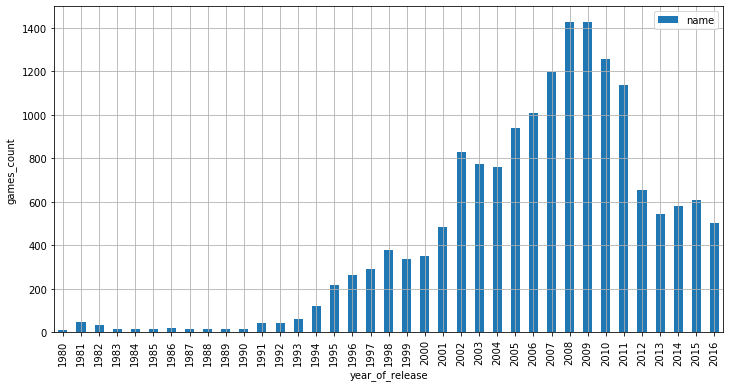

In [22]:
games_years = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_years.plot(y = 'name', kind= 'bar', grid=True, figsize = (12,6))
plt.ylabel('games_count')
plt.show()

**Вывод:** С развитием и совершенствованием компьютеров и ростом популярности игровых приставок наблюдается уверенный рост выпуска игр, начиная с 90-х годов. Пик выпуска приходится на 2005-2011 годы. После 2009 года заметен спад, что, скорее всего, связано с быстрым развитием игр для мобильных платформ.

### Распределение продаж по годам

Теперь посмотрим, как менялись продажи по платформам. Для начала выберем шесть платформ с наибольшими общими продажами:

In [23]:
leaders = games.groupby('platform')['total_sales'].sum().sort_values()[-6:].index.tolist()
leaders

['ps', 'ds', 'wii', 'ps3', 'x360', 'ps2']

Построим распределение по годам:

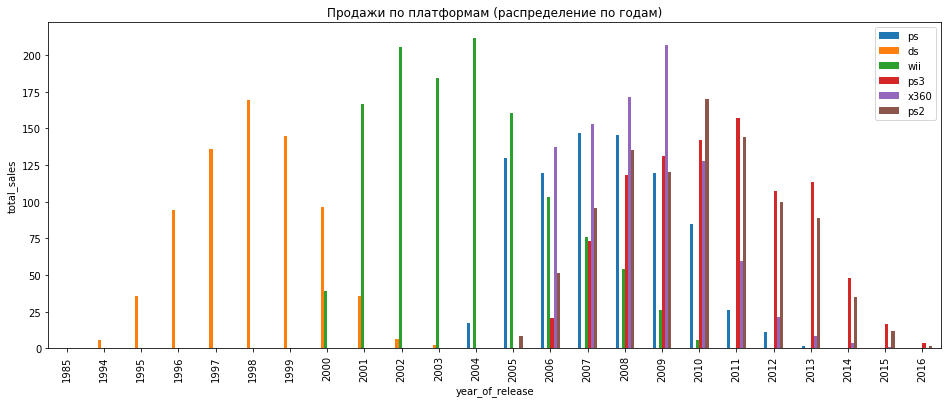

In [24]:
games[['total_sales', 'year_of_release', 'platform']].query('platform in @leaders').groupby(['year_of_release', 'platform']).sum().unstack('platform').plot(kind='bar', stacked=False, figsize = (16,6))
plt.legend(leaders)
plt.title('Продажи по платформам (распределение по годам)')
plt.ylabel('total_sales')
plt.xlabel('year_of_release')
plt.show()

**Вывод:** Срок жизни платформ составляет примерно 10 лет. В 2006 году появилось сразу несколько новых платформ. Актуальным будем считать период с 2013 года. 

In [25]:
games = games[games['year_of_release'] >= 2013]

### Поиск потенциально прибыльных платформ

Далее выберем 10 прибыльных платформ:

In [26]:
top_10 = games.groupby('platform')['total_sales'].sum().sort_values()[-10:].index.tolist()
top_10

['psp', 'wii', 'psv', 'pc', 'wiiu', 'x360', '3ds', 'xone', 'ps3', 'ps4']

Посмотрим на графике динамику продаж для этих платформ:

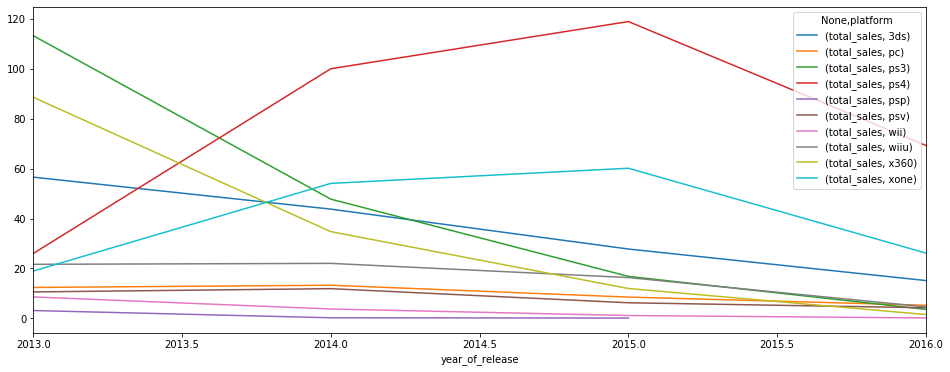

In [27]:
games.query('platform in @top_10').pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').unstack('platform').plot(figsize = (16,6))

**Вывод:** В целом продажи падают на всех платформах. Наиболее прибыльными на 2016 год являются *ps4*, *xone*, *3ds*. Не будем сбрасывать со счетов и игры на *pc*, так как время показывает, что продажи не гигантские, то достаточно стабильные. 

Будем считать перспективными платформы, которые все еще существуют в 2016 году и входят в топ-10 по продажам за актуальный период. Построим для них «ящики с усами»:

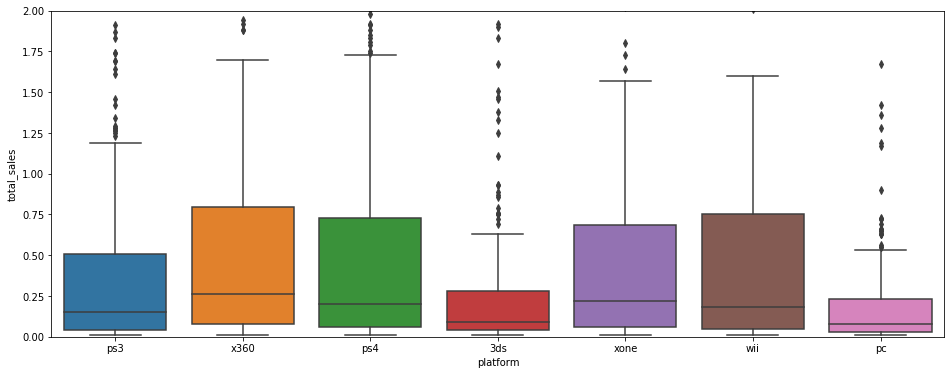

In [28]:
promising = ['xone', 'pc', '3ds', 'ps4', 'wii', 'ps3', 'x360']
data = games.query('platform in @promising')
plt.figure(figsize=(16, 6))
plt.ylim(0, 2)
sns.boxplot(data = data, y = 'total_sales', x='platform')
sns.set_style("whitegrid")

**Вывод:** Наибольшие медианные продажи у платформ *x360*, далее идут *xone* и *ps4*. Продажи игр для *pc* заметно хуже, и игры для них стоят дешевле, чем для консолей. Из консолей хуже всех продаются игры на *3ds*. У всех платформ наблюдается скошенность вправо, что говорит о перспективности продаж. У всех платформ большая плотность выбросов (возможно это продажи игр, оказавшихся хитами). В целом можно выделить четверку лидеров с точки зрения перспективности — *x360*, *xone*, *wii* и *ps4*. Если еще сократить, то можно остановиться на двух свеженьких (для исследуемого времени) платформах-конкурентах — *xone* и *ps4*. 

### Корреляция между отзывами и продажами на примере PS4

Построим попарные диаграммы рассеяния:

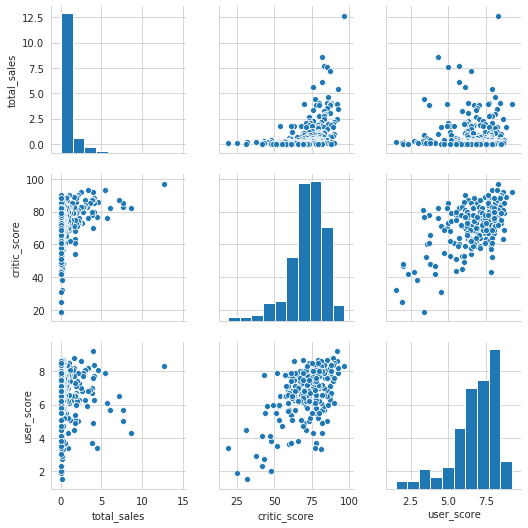

In [29]:
sns.pairplot(games[games.platform == "ps4"][['total_sales', 'critic_score', 'user_score']])
plt.show()

Посчитаем корреляцию:

In [30]:
games[games.platform == "ps4"][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


**Вывод:** Наблюдается небольшая корреляция между отзывами критиков и продажами. Что же касается отзывов пользователей, то тут, как ни странно, никакой корреляции нет. И дополнительное наблюдение: достаточно сильная корреляция между отзывами критиков и пользователей (что в целом логично, хотя, например, с фильмами такая ситуация редка).

### Корреляция между отзывами и продажами: сравнение с другими платформами

Посмотрим, как обстоят дела с другими платформами

In [31]:
promising = ['xone', 'pc', '3ds', 'wii', 'ps3', 'x360', 'ps4']

In [32]:
for platform in promising:
    m = games[games.platform == platform][['total_sales', 'critic_score', 'user_score']].corr()
    print(platform)
    print(m)
    print()

xone
              total_sales  critic_score  user_score
total_sales      1.000000      0.416998   -0.068925
critic_score     0.416998      1.000000    0.472462
user_score      -0.068925      0.472462    1.000000

pc
              total_sales  critic_score  user_score
total_sales      1.000000      0.196030   -0.093842
critic_score     0.196030      1.000000    0.429562
user_score      -0.093842      0.429562    1.000000

3ds
              total_sales  critic_score  user_score
total_sales      1.000000      0.357057    0.241504
critic_score     0.357057      1.000000    0.769536
user_score       0.241504      0.769536    1.000000

wii
              total_sales  critic_score  user_score
total_sales      1.000000           NaN    0.682942
critic_score          NaN           NaN         NaN
user_score       0.682942           NaN    1.000000

ps3
              total_sales  critic_score  user_score
total_sales      1.000000      0.334285    0.002394
critic_score     0.334285      1.000000 

**Вывод:** Также как и у *ps4*, у остальных платформ не наблюдается корреляции (либо она очень слабая) между оценками пользователей и продажами. Также у остальных платформ есть сравнимая с *ps4* небольшая корреляция между оценками критиков и продажами (кроме, пожалуй, платформы *wii*, у которой она слабее).

## Распределение игр по жанрам

Посмотрим на количество выпускаемых игр по жанрам:

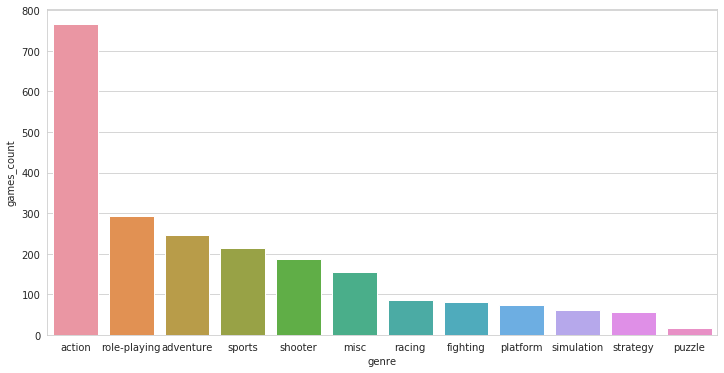

In [33]:
gc = games.groupby('genre')['genre'].count().sort_values(ascending=False)
genres = gc.index
plt.figure(figsize=(12,6))
sns.barplot(x=genres, y=gc)
plt.ylabel('games_count')
plt.show()

Больше всего игр в жанре *action*, затем идут *role-playing*, *adventure*, *sports*

Взглянем на продажи:

In [34]:
games.groupby('genre')[['total_sales']].sum().sort_values('total_sales', ascending=False).style.bar(color='grey')

,total_sales
genre,
action,321.87
shooter,232.98
sports,150.65
role-playing,145.89
misc,62.82
platform,42.63
racing,39.89
fighting,35.31
adventure,23.64


**Вывод:** Больше всего продаются игры жанра *action* (тут спрос рождает предложение и наоборот). 
Игры в жанре *shooter* на втором месте по продажам, хотя их выпускается почти в 4 раза меньше, чем *action*. А вот жанр *adventure* продается очень плохо.

## Портрет пользователя по регионам

### Самые популярные платформы (топ-5) по регионам

In [35]:
na_index = games.groupby('platform')['na_sales'].sum().sort_values()[-5:].index.tolist()
na_values = games.groupby('platform')['na_sales'].sum().sort_values()[-5:]

eu_index = games.groupby('platform')['eu_sales'].sum().sort_values()[-5:].index.tolist()
eu_values = games.groupby('platform')['eu_sales'].sum().sort_values()[-5:]

jp_index = games.groupby('platform')['jp_sales'].sum().sort_values()[-5:].index.tolist()
jp_values = games.groupby('platform')['jp_sales'].sum().sort_values()[-5:]

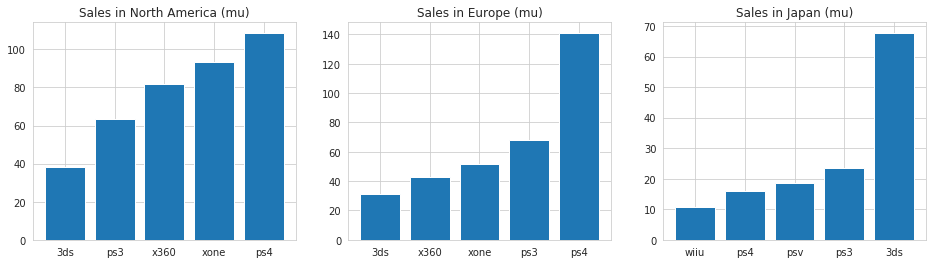

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

ax1.bar(na_index, na_values)
ax1.set_title("Sales in North America (mu)")

ax2.bar(eu_index, eu_values)
ax2.set_title("Sales in Europe (mu)")

ax3.bar(jp_index, jp_values)
ax3.set_title("Sales in Japan (mu)")

plt.show()

**Вывод:** Различия в топ-5 для каждого региона присутствуют, но платформы *3ds*, *ps3* и *ps4* присутствуют в топе во всех трех регионах. Самой популярной платформой в Северной Америке и в Европе — *ps4*, а в Японии — *3ds*.

In [37]:
for platform in na_values.index:
    ratios_na = na_values / games['na_sales'].sum()
print(ratios_na)

platform
3ds     0.087272
ps3     0.145073
x360    0.186562
xone    0.212744
ps4     0.248429
Name: na_sales, dtype: float64


In [38]:
for platform in eu_values.index:
    ratios_eu = eu_values / games['eu_sales'].sum()
print(ratios_eu)

platform
3ds     0.078933
x360    0.108406
xone    0.131530
ps3     0.172883
ps4     0.359712
Name: eu_sales, dtype: float64


In [39]:
for platform in jp_values.index:
    ratios_jp = jp_values / games['jp_sales'].sum()
print(ratios_jp)

platform
wiiu    0.077284
ps4     0.113368
psv     0.132050
ps3     0.165862
3ds     0.481674
Name: jp_sales, dtype: float64


### Самые популярные жанры (топ-5)

In [40]:
na_index_genre = games.groupby('genre')['na_sales'].sum().sort_values()[-5:].index.tolist()
na_values_genre = games.groupby('genre')['na_sales'].sum().sort_values()[-5:]

eu_index_genre = games.groupby('genre')['eu_sales'].sum().sort_values()[-5:].index.tolist()
eu_values_genre = games.groupby('genre')['eu_sales'].sum().sort_values()[-5:]

jp_index_genre = games.groupby('genre')['jp_sales'].sum().sort_values()[-5:].index.tolist()
jp_values_genre = games.groupby('genre')['jp_sales'].sum().sort_values()[-5:]

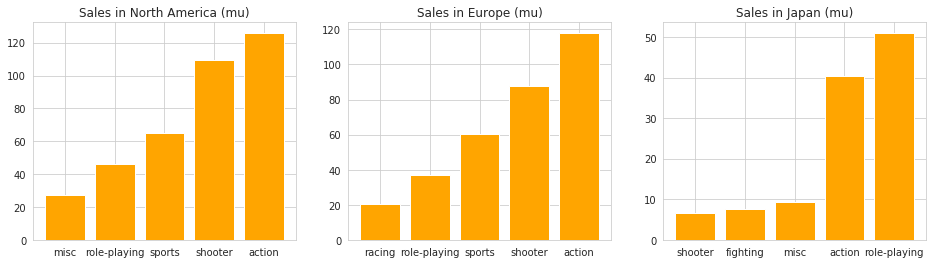

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

ax1.bar(na_index_genre, na_values_genre, color='orange')
ax1.set_title("Sales in North America (mu)")

ax2.bar(eu_index_genre, eu_values_genre, color='orange')
ax2.set_title("Sales in Europe (mu)")

ax3.bar(jp_index_genre, jp_values_genre, color='orange')
ax3.set_title("Sales in Japan (mu)")

plt.show()

**Вывод:** В Северной Америке и Европе топ-5 жанров практически совпадает, самым популярным является *action*. В Японии же другая ситуация, и абсолютный лидер там — жанр *role-playing*. Все это можно объяснить схожим культурным бэкграундом жителей Северной Америки и Европы, в то время как культура Японии сильно отличается от западной и европейской, что и приводит к таким различиям в предпочтениях. Также в Японии имеется свой поджанр компьютерных ролевых игр, со своим стилем и механикой, отличный от игр западного образца.

### Рейтинг ESRB и продажи по регионам

Расшифровка типов рейтинга:
- "e" ("veryone") — «Для всех»
- "ec" ("Early childhood") — «Для детей младшего возраста»
- "e10+" ("Everyone 10 and older") — «Для всех от 10 лет»
- "t" ("Teen") — «Для подростков»  
- "m" ("Mature") — «Для взрослых»  
- "rp" ("Rating Pending") — «Рейтинг ожидается»

In [42]:
na_index_genre = games.groupby('rating')['na_sales'].sum().sort_values()[-5:].index.tolist()
na_values_genre = games.groupby('rating')['na_sales'].sum().sort_values()[-5:]

eu_index_genre = games.groupby('rating')['eu_sales'].sum().sort_values()[-5:].index.tolist()
eu_values_genre = games.groupby('rating')['eu_sales'].sum().sort_values()[-5:]

jp_index_genre = games.groupby('rating')['jp_sales'].sum().sort_values()[-5:].index.tolist()
jp_values_genre = games.groupby('rating')['jp_sales'].sum().sort_values()[-5:]

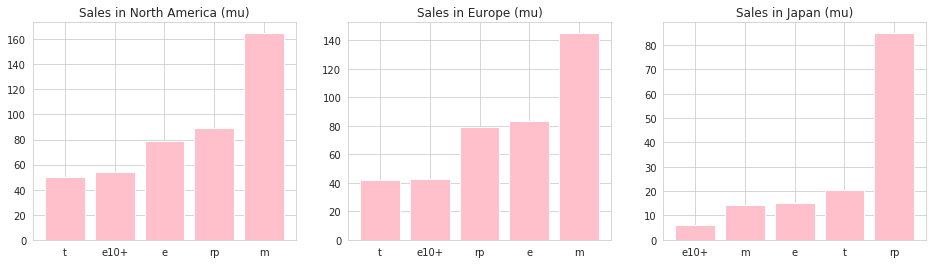

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

ax1.bar(na_index_genre, na_values_genre, color='pink')
ax1.set_title("Sales in North America (mu)")

ax2.bar(eu_index_genre, eu_values_genre, color='pink')
ax2.set_title("Sales in Europe (mu)")

ax3.bar(jp_index_genre, jp_values_genre, color='pink')
ax3.set_title("Sales in Japan (mu)")

plt.show()

**Вывод:** В Северной Америке и Европе по продажам лидируют игры с рейтингом "m". А в Японии на первом месте игры для подростков, рейтинг "t" (не учитывая игры с еще не проставленным рейтингом). Возможно, причина в том, что в Японии есть своя система - Computer Entertainment Rating Organization (CERO).

## Проверка гипотез

### Гипотеза 1: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы:

$H_0:$ средние пользовательские рейтинги платформ Xbox One и PC одинаковые    

$H_1:$ средние пользовательские рейтинги платформ Xbox One и PC различаются

Зададим уровень статистической значимости и создадим две таблицы:

In [44]:
alpha = .05
xone = games.query('platform == "xone"')['user_score'].dropna()
pc = games.query('platform == "pc"')['user_score'].dropna()

Посмотрим на дисперсии выборок:

In [45]:
xone_var = xone.var(ddof=1)
pc_var = pc.var(ddof=1)
xone_var

1.9069968429360695

In [46]:
pc_var

3.035892752408882

In [47]:
from scipy.stats import levene
stat, p = levene(xone, pc)
p

0.003897553110130418

Значение p по тесту Левене маленькое, значит, будем считать дисперсии генеральных совокупностей отличающимися и выставим параметр equal_var=False. Проверяем гипотезу с использованием критерия Стьюдента для независимых выборок:

In [48]:
results = st.ttest_ind(xone, pc, equal_var=False) 
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Не получилось отвергнуть нулевую гипотезу. С вероятностью 15% можно утверждать, что средние пользовательские рейтинги платформ Xbox One и PC различаются. 

### Гипотеза 2: средние пользовательские рейтинги жанров *action* и *sports* разные

$H_0:$ средние пользовательские рейтинги жанров action и sports одинаковые    

$H_1:$ средние пользовательские рейтинги жанров action и sports различаются

In [49]:
alpha = .05
action = games.query('genre == "action"')['user_score'].dropna()
sports = games.query('genre == "sports"')['user_score'].dropna()

In [50]:
action_var = action.var(ddof=1)
sports_var = sports.var(ddof=1)
action_var

1.7693609042482705

In [51]:
sports_var

3.180612814465409

In [52]:
from scipy.stats import levene
stat, p = levene(action, sports)
p

4.2566688218274047e-07

По тесту Левене будем считать, что дисперсии генеральных совокупностей равны и выставим параметр equal_var=True. Проверяем гипотезу с использованием критерия Стьюдента для независимых выборок:

In [53]:
results = st.ttest_ind(action, sports, equal_var=True) 
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


**Вывод:** Отвергаем нулевую гипотезу. Вероятность получить одинаковые средние рейнтинги по этим двум жанрам почти нулевая.

## Общий вывод

В ходе проекта был произведен исследовательский анализ данных, составлен портрет пользователя каждого региона и проверены две гипотезы.

Исследовательский анализ позволил сделать следующие выводы:
- Пик выпуска игр приходится на 2005-2011 годы. После 2009 года заметен спад, что, скорее всего, связано с быстрым развитием игр для мобильных платформ
- Срок жизни платформ составляет примерно 10 лет
- Наиболее перспективными можно считать платформы *x360*, *xone*, *ps3* и *ps4* (если сократить до двух, то *xone* и *ps4*)
- Для всех платформ не наблюдается корреляции (либо она очень слабая) между оценками пользователей и продажами. Есть небольшая корреляция между оценками критиков и продажами

Такими получились портреты пользователей по регионам:
- Северная Америка: 
    - самые популярные платформы — *ps4*, *xone*, *х360*
    - самые популярные жанры — *action*, *shooter*, *sports*
    - возрастной рейтинг — *m*
- Европа: 
    - самые популярные платформы — *ps4*, *ps3*, *xone*
    - самые популярные жанры — *action*, *shooter*, *sports*
    - возрастной рейтинг — *m*
- Япония: 
    - самые популярные платформы — *3ds*, *ps3*, *psv*
    - самые популярные жанры — *role-playing*, *action*, *misc*
    - возрастной рейтинг — *t*    

В целом можно сказать, что типичные пользователи Северной Америки и Европы очень похожи, а вот пользователи из Японии имеют характерные отличия, возможно обусловенные культурными особенностями

Проверка гипотез показала:
   - С вероятностью 15% можно утверждать, что средние пользовательские рейтинги платформ Xbox One и PC различаются
   - Вероятность получить одинаковые средние рейнтинги по жанрам *action* и *sports*  почти нулевая